<a href="https://colab.research.google.com/github/Varshitha-29/DNN_ICP8/blob/main/ICP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32


input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/5
47/47 [==============================] - 1s 9ms/step - loss: 0.5604 - accuracy: 0.0022 - val_loss: 0.4559 - val_accuracy: 0.0010
Epoch 2/5
47/47 [==============================] - 0s 5ms/step - loss: 0.4187 - accuracy: 0.0065 - val_loss: 0.3968 - val_accuracy: 0.0150
Epoch 3/5
47/47 [==============================] - 0s 5ms/step - loss: 0.3821 - accuracy: 0.0098 - val_loss: 0.3744 - val_accuracy: 0.0110
Epoch 4/5
47/47 [==============================] - 0s 5ms/step - loss: 0.3631 - accuracy: 0.0092 - val_loss: 0.3587 - val_accuracy: 0.0140
Epoch 5/5
47/47 [==============================] - 0s 5ms/step - loss: 0.3494 - accuracy: 0.0103 - val_loss: 0.3478 - val_accuracy: 0.0140


In [ ]:
prediction = autoencoder.predict(x_test)


32/32 [==============================] - 0s 950us/step


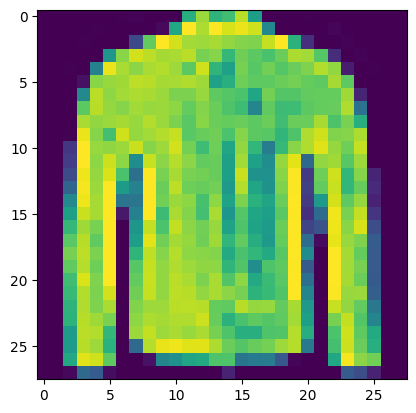

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

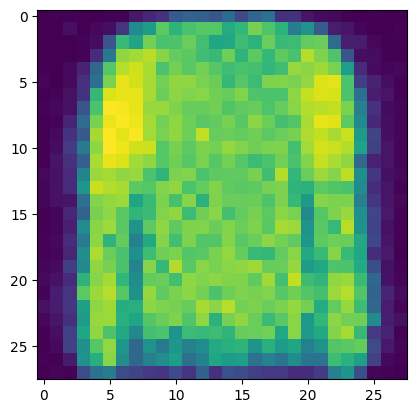

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

1. Add one more hidden layer to autoencoder

In [ ]:
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.3240 - accuracy: 0.0140 - val_loss: 0.2932 - val_accuracy: 0.0213
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.2866 - accuracy: 0.0243 - val_loss: 0.2849 - val_accuracy: 0.0286
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.2807 - accuracy: 0.0284 - val_loss: 0.2809 - val_accuracy: 0.0271
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.2776 - accuracy: 0.0294 - val_loss: 0.2797 - val_accuracy: 0.0302
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.2754 - accuracy: 0.0316 - val_loss: 0.2773 - val_accuracy: 0.0294


2. Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

In [ ]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


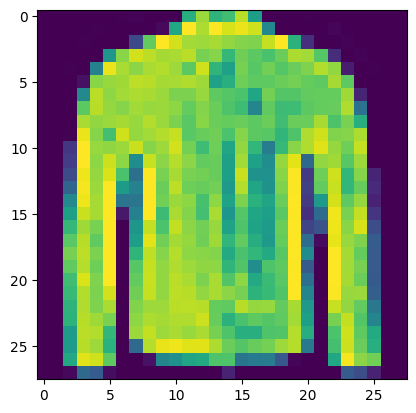

In [ ]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

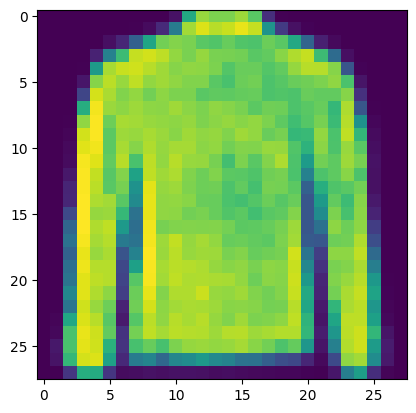

In [ ]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

3. Repeat the question 2 on the denoisening autoencoder

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
     # this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 [==============================] - 1s 11ms/step - loss: 0.6324 - accuracy: 0.0013 - val_loss: 0.5419 - val_accuracy: 0.0030
Epoch 2/10
24/24 [==============================] - 0s 7ms/step - loss: 0.4936 - accuracy: 0.0025 - val_loss: 0.4531 - val_accuracy: 0.0040
Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 0.4311 - accuracy: 0.0027 - val_loss: 0.4126 - val_accuracy: 0.0020
Epoch 4/10
24/24 [==============================] - 0s 7ms/step - loss: 0.4032 - accuracy: 0.0053 - val_loss: 0.3949 - val_accuracy: 0.0040
Epoch 5/10
24/24 [==============================] - 0s 7ms/step - loss: 0.3883 - accuracy: 0.0088 - val_loss: 0.3822 - val_accuracy: 0.0040
Epoch 6/10
24/24 [==============================] - 0s 7ms/step - loss: 0.3763 - accuracy: 0.0083 - val_loss: 0.3710 - val_accuracy: 0.0020
Epoch 7/10
24/24 [==============================] - 0s 6ms/step - loss: 0.3660 - accuracy: 0.0090 - val_loss: 0.3609 - val_accuracy: 0.0030
Epoch 8/10
24/24 [=

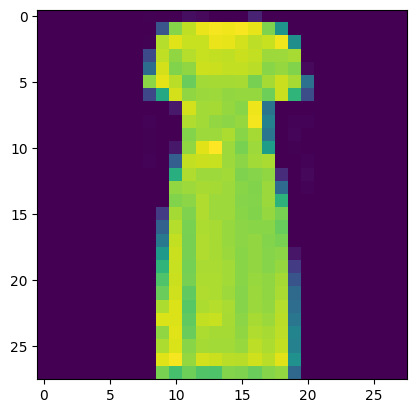

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

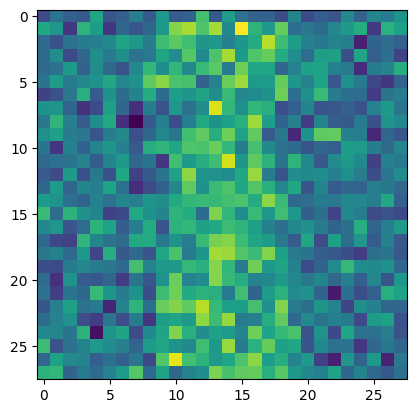

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

In [ ]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

32/32 [==============================] - 0s 905us/step


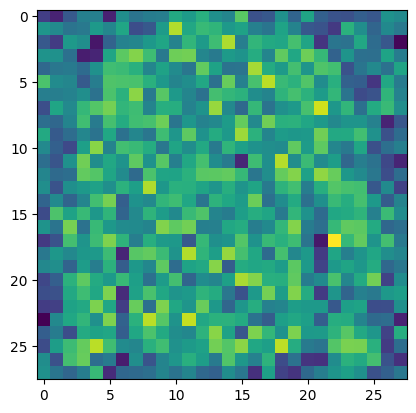

In [ ]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()


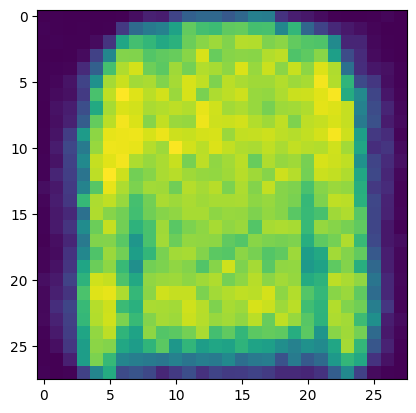

In [ ]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

4. plot loss and accuracy using the history object


In [ ]:
autoencoder.metrics_names


['loss', 'accuracy']

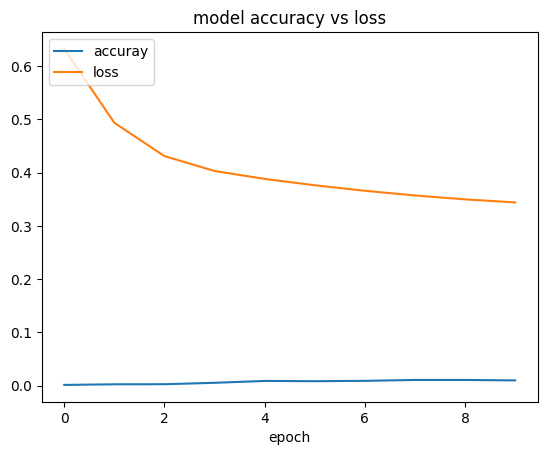

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

